### Topics

1. Training models

2. Train-test split

3. Cross-validations

4. Sampling bias

5. Model evaluation

6. Regression

7. Classification

8. Grid search

### Train Test  Split

#### Why do we need train and test split?

#### Answer:
1. An ML model needs to be trained and tested.
2. The only way to test a model is by showing it unseen data.
3. Since unseen data is not always available. Neither are labels associated with them.
4. The complete dataset is instead divided into 2 parts train and test

#### Overfitting Problem
1. If a data is trained on entire dataset, there is no way to tell if it will perform well on outside data
2. We cannot understand if it overfits(learns non-data information or noise) or underfits(does not learn eveything from the data)
3. The way to deal with overfitting is regularization(which includes L1, L2 and Elastic Net)
4. We can test regularized model and perform Validation to see if it overfits 
5. We know it overfits when It performs well on Training set and not when performing Validation
6. Performance metrics include accuracy and confusion matrix<b>(we will cover this in Logistic Regression)</b>
6. A few ratios of train-validation splits are 60-40 or  70-30

#### Summarize

1. <b>Train</b> Data goes into model
2. <b>Validation</b> is to tune the model. Your model can overfit/underfit or you may want to try multiple models to see which one performs better on your current dataset
3. <b>Test</b> dataset is your final dataset on which you test your model and declare it to be generalized well and accurate.

### train-test split framework

1. ScikitLearn uses train_test_split for dividing the data into train and test
2. Lets look at the parameters

In [1]:
from sklearn.model_selection import train_test_split

In [7]:
print(train_test_split.__doc__)

Split arrays or matrices into random train and test subsets

    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also None, it will
        be set to 0.25.

    train_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and re

#### Lets look at the parameters of the above function

* <b>train_size</b>: you specify how many rows is train data as % of total data
* <b>test_size</b>: you specify how many rows is test data as % of total. train gets automatically decided
* <b> random_state</b>: when shuffling data before train and test. the random state creates similar dataset split as before to reproduce a same result from a model or data.
* <b> shuffle </b> whether we want data shuffled or just original indexing
* <b> stratified sampling </b> the column or class you choose, the data is split in a stratified fashion using that column

#### Train Test in Action
Boston House Pricing Data

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston_data = load_boston()

In [10]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
X,y = (boston_data['data'],boston_data['target'])

In [11]:
#boston_data

In [6]:
import pandas as pd
import numpy as np

In [7]:
X = pd.DataFrame(X, columns = boston_data.feature_names)

In [8]:
y = pd.DataFrame(y)

In [9]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### Lets perform trian-test split on this data

In [11]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1000,shuffle=True, train_size=0.7)

In [25]:
X_train.shape

(354, 13)

In [26]:
X_test.shape

(152, 13)

In [27]:
y_train.shape

(354, 1)

In [28]:
y_test.shape

(152, 1)

In [29]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
266,0.78570,20.0,3.97,0.0,0.647,7.014,84.6,2.1329,5.0,264.0,13.0,384.07,14.79
363,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
180,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56
229,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
87,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44


In [30]:
# Check if split is actually correct
# We can see it's roughly 70% train and 30% test
# So we can proceed!
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.6996047430830039
0.30039525691699603


### What is the ratio of Trian to Test? Does something seem missing ??
Answer:

### Lets Perform Linear Regression

In [33]:
from sklearn import linear_model

In [34]:
reg = linear_model.LinearRegression()

In [35]:
reg.fit(X_train,y_train)

LinearRegression()

### Introducing Cross Validation
1. We do not create a seperate dataset division for cross validation
2. We divide train data into K folds and leave one out of K for testing and rest for training.
3. This creates K models and average score tells us if model generalizes well
4. This is known as k-fold CV

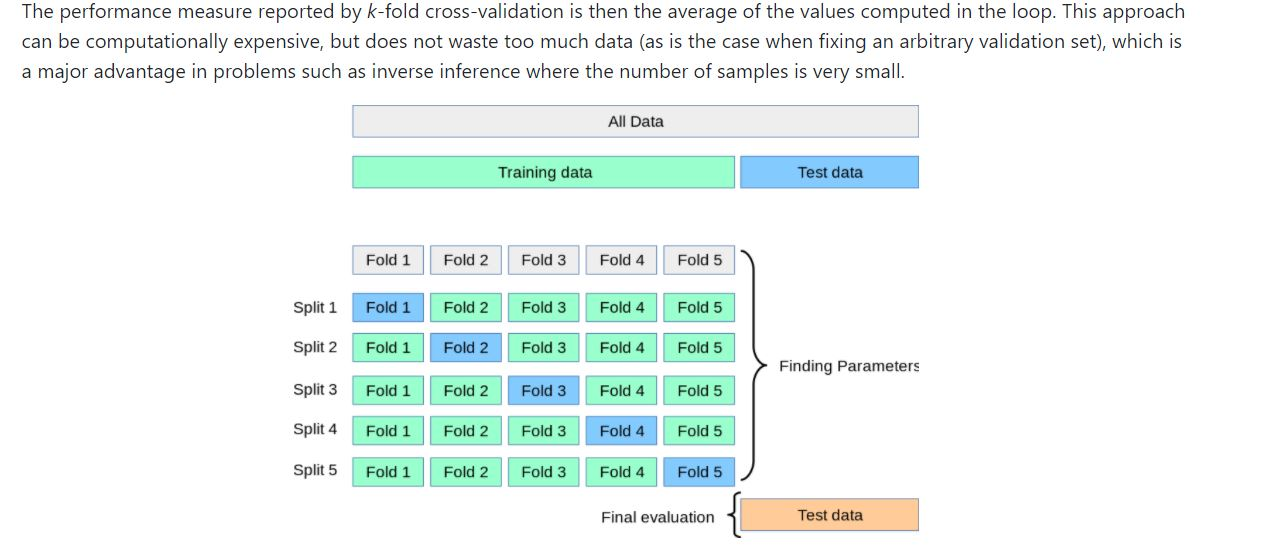

In [32]:
from IPython.display import Image
Image("./kfoldCV.jpg")

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold  = KFold(n_splits=7, random_state=100)
results = cross_val_score(reg, X_train, y_train, cv=k_fold)

C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [41]:
results

array([0.82625599, 0.617383  , 0.74534554, 0.72435769, 0.72078552,
       0.71706902, 0.77190949])

In [42]:
results.mean()

0.7318723223652778

In [43]:
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=7,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [44]:
get_cv_scores(reg)

CV Mean:  0.7318723223652778
STD:  0.058796392133400315




#### Let us check if this kind of accuracy holds even on test dataset

In [45]:
y_pred = reg.predict(X_test)

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test,y_pred)

0.6394929510156997

### Lets see if Regularization improves Model Performance(Prediction Accuracy)

#### Lasso Regularization

In [56]:
lasso = linear_model.Lasso(alpha=0.5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [54]:
results = cross_val_score(lasso, X_train, y_train, cv=k_fold)
results

array([0.674191  , 0.66369598, 0.60147534, 0.73728221, 0.6088477 ,
       0.57931674, 0.61836176])

In [55]:
get_cv_scores(lasso)

CV Mean:  0.640452960383907
STD:  0.05042420434029621




#### Let us test again on final test dataset

In [99]:
y_pred_lasso = lasso.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.6451529143107276

#### Ridge Regression

In [58]:
ridge = linear_model.Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [59]:
results = cross_val_score(ridge, X_train, y_train, cv=k_fold)
results

array([0.81195658, 0.60725715, 0.73459185, 0.71439939, 0.72593422,
       0.71602711, 0.76958805])

In [60]:
get_cv_scores(ridge)

CV Mean:  0.7256791935104665
STD:  0.05818130935747404




#### test on final test data

In [61]:
y_pred_ridge = ridge.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.6503626921760494

## What is Grid Search CV ?

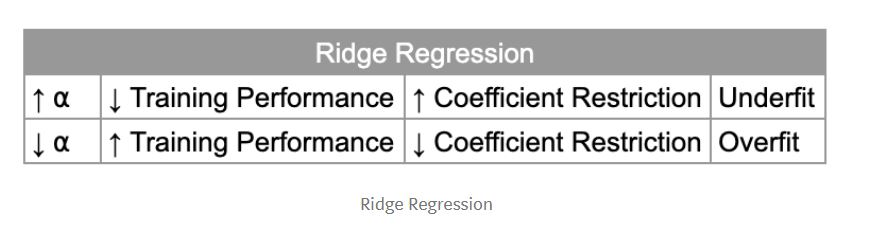

In [109]:
from IPython.display import Image
Image("./ridgereg.jpg")

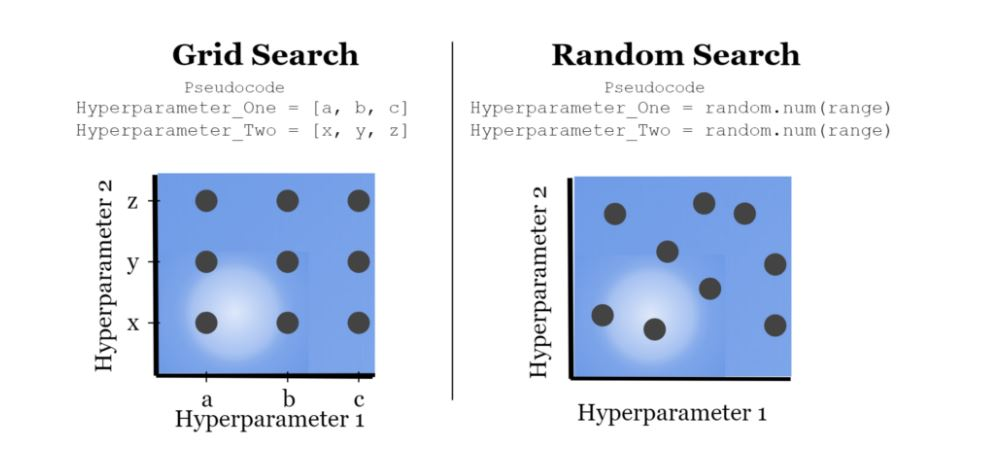

In [107]:
Image("./gridsearch.JPG")

* With lower values of ⍺ the coefficients are less restricted. 

* When ⍺ is very small the model becomes more similar to linear regression above and we risk overfitting.

[source: 'https://towardsdatascience.com/linear-regression-models-4a3d14b8d368' ]

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, cv=7,param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 7 folds for each of 7 candidates, totalling 49 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.7318723218957389
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  42 out of  49 | elapsed:    2.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    2.6s finished


In [66]:
#### Let us test this on our test model
y_pred_grid = grid.best_estimator_.predict(X_test)
r2_score(y_test,y_pred_grid)

0.6395201902643152

### Sampling Bias ( A Note)

1. Machine Learning and Statistics work on the principle ' garbage in garbage out'

2. We have to make sure we have right data samples to get right results.

3. When doing a survey where you want to find what motivates students to attend a university
    
    a. you need to send survey to students not only who joined one year ago but also students who joined 2 and 3 years ago.
    
    b. equal representation of male and female students.
    
    c. equal representation of students from various countries
    
    d. equal representation from various departments

#### Types of sampling Biases
1. Undercoverage
2. Non response Bias
3. Voluntary Response Bias


#### How to avoid ?
1. Random Sampling
2. Stratified Sampling - same distribution of sample as population
3. Use correct options in survey to get right answers

#### Confusion Matrix for Classification

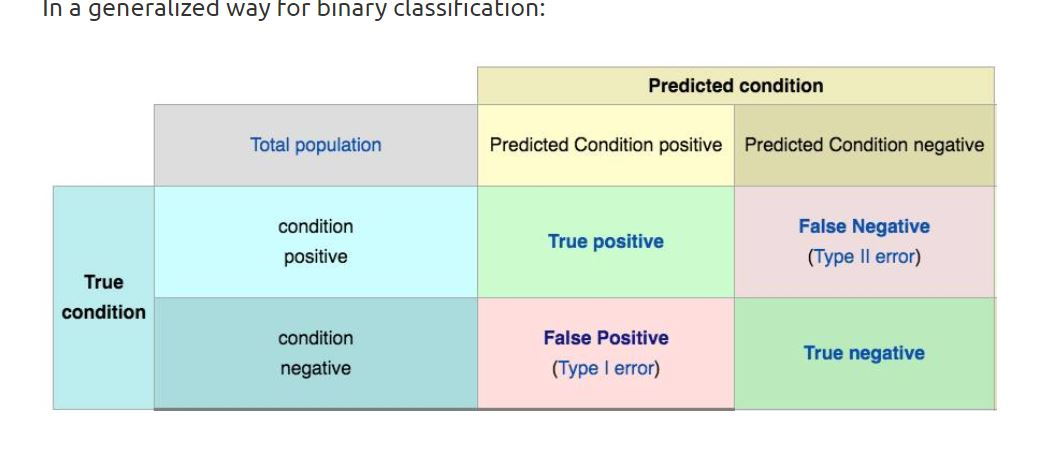

In [111]:
Image("./bin_class_metric.JPG")

#### R² Error: 
Coefficient of Determination or R² is another metric used for evaluating the performance of a regression model. 

The metric helps us to compare our current model with a constant baseline and tells us how much our model is better. 

The constant baseline is chosen by taking the mean of the data and drawing a line at the mean. 

R² is a scale-free score that implies it doesn't matter whether the values are too large or too small, the R² will always be less than or equal to 1.

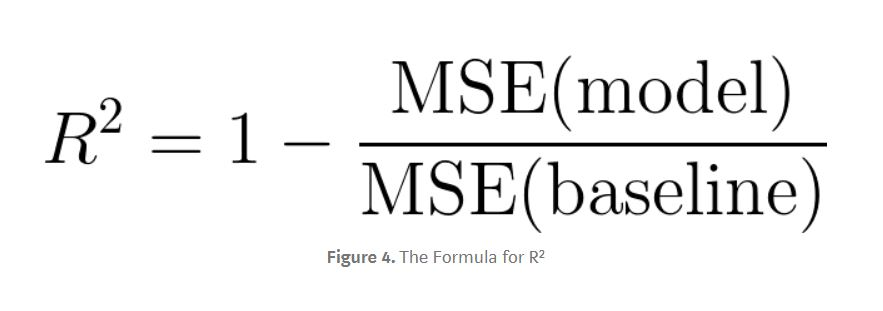

In [112]:
Image("./Rsquared.JPG")